~[INFO]: ALGPlotter instance created.


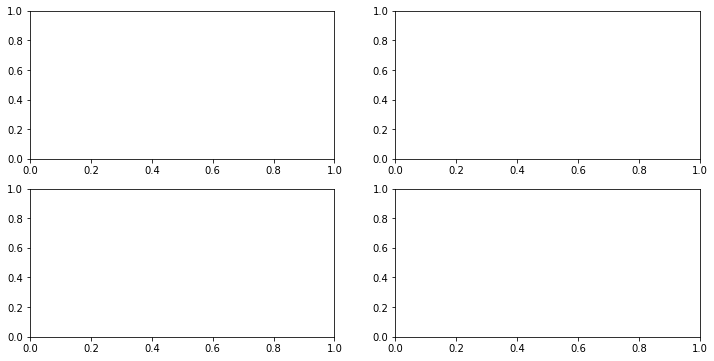

In [2]:
import torch

from GLOBALS import *
from alg_plotter import plotter
from alg_env_wrapper import env
from alg_nets import *
from alg_replay_buffer import ReplayBuffer
from play import play

In [202]:
critic = CriticNet(obs_size=env.observation_size(), n_actions=env.action_size(), n_agents=1)
target_critic = CriticNet(obs_size=env.observation_size(), n_actions=env.action_size(), n_agents=1)
# target_critic.load_state_dict(critic.state_dict())

Entropy

In [203]:
from scipy.stats import entropy

In [204]:
list_of_params = list(critic.parameters())
list_of_target_params = list(target_critic.parameters())

In [205]:
entropy(list_of_params[0][0].detach().numpy(), list_of_target_params[0][0].detach().numpy())

inf

In [206]:
a = list_of_params[0][0].softmax(dim=0).detach().numpy()
a

array([0.15159181, 0.1180577 , 0.09163395, 0.15329704, 0.11166577,
       0.16388927, 0.12194274, 0.08792175], dtype=float32)

In [207]:
b = list_of_target_params[0][0].softmax(dim=0).detach().numpy()
b

array([0.13697003, 0.10682967, 0.15041651, 0.1320622 , 0.13268153,
       0.10633211, 0.10866807, 0.12603989], dtype=float32)

In [208]:
from math import log

In [209]:
"""
# H(P, Q) = H(P) + KL(P || Q)
# Where H(P, Q) is the cross-entropy of Q from P,
# H(P) is the entropy of P and
# KL(P || Q) is the divergence of Q from P.
"""

# calculate entropy H(P)
def entropy(p):
	return -sum([p[i] * log(p[i]) for i in range(len(p))])
# calculate cross entropy
def cross_entropy(p, q):
	return -sum(pp * log(qq) for pp, qq in zip(p, q))
# calculate the kl divergence KL(P || Q)
def kl_divergence(p, q):
	return sum(p[i] * log(p[i]/q[i]) for i in range(len(p)))

In [210]:
kl_divergence(a,b)

0.03865296524622788

In [215]:
cross_entropy(a,b)

2.094931482974282

In [216]:
entropy(a)

2.056278520277411

In [217]:
entropy(a) + kl_divergence(a,b)


2.094931485523639